In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import descartes as ds
import geopandas
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME, user='postgres', password='2645')

In [3]:
map = geopandas.read_file('reg10puma.shp')


Area, not south - 0 (03), 1 (04), 2 (05), 8 (09), 9 (08), 10 (07), 11 (02), 12 (01), 13 (06),  14 (16),  
Area, south     - 3 (11), 4 (10), 5 (13), 6 (14), 7 (12), 15 (15)

In [4]:
map.loc[0:15, 'geometry']
king = map[0:16]


In [5]:
oy_count = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name, p.puma
                                           FROM pums_2017 p
                                           JOIN puma_names_2010 n
                                           ON p.puma = n.puma
                                           WHERE p.puma BETWEEN '11601' AND '11616'
                                           AND (p.esr = '3' OR p.esr = '6'
                                                OR p.wkl = '2' OR p.wkl = '3')
                                           AND p.sch = '1'
                                           AND p.agep BETWEEN '16' AND '24'
                                           GROUP BY n.puma_name, p.puma
                                           ORDER BY oy_count DESC
                                           ;""", conn)
oy_count = oy_count.set_index('puma')
oy_count


,oy_count,puma_name
puma,,
11611,2038.0,"King County (West Central)--Burien, SeaTac, Tu..."
11613,2006.0,King County (Southwest Central)--Kent City ...
11612,1977.0,"King County (Far Southwest)--Federal Way, Des ..."
11610,1853.0,"King County (Central)--Renton City, Fairwood, ..."
11614,1530.0,King County (Southwest)--Auburn City & Lakelan...
11602,1325.0,Seattle City (Northeast) ...
11615,1210.0,"King County (Southeast)--Maple Valley, Covingt..."
11608,1086.0,King County (Northwest Central)--Greater Belle...
11603,1032.0,Seattle City (Downtown)--Queen Anne & Magnolia...


In [6]:
king['puma'] = ['11603', '11604', '11605', '11611', '11610', '11613', '11614', '11612', '11609', '11608', '11607', '11602', '11601', '11606', '11616', '11615']
king['is_south'] = [False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, True]
#king = king.join(oy_count, on='puma')
king = king.set_index('puma')
king['oy'] = oy_count['oy_count']
king

<ipython-input-6-67179476036b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  king['puma'] = ['11603', '11604', '11605', '11611', '11610', '11613', '11614', '11612', '11609', '11608', '11607', '11602', '11601', '11606', '11616', '11615']
<ipython-input-6-67179476036b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  king['is_south'] = [False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, True]


,geometry,is_south,oy
puma,,,
11603,"POLYGON ((-122.34484 47.59922, -122.34474 47.6...",False,1032.0
11604,"POLYGON ((-122.25574 47.64712, -122.25909 47.6...",False,916.0
11605,"POLYGON ((-122.27007 47.50966, -122.27155 47.5...",False,908.0
11611,"POLYGON ((-122.21746 47.44117, -122.21759 47.4...",True,2038.0
11610,"POLYGON ((-122.12208 47.50248, -122.12208 47.5...",True,1853.0
11613,"POLYGON ((-122.14580 47.34353, -122.14627 47.3...",True,2006.0
11614,"POLYGON ((-122.11388 47.21865, -122.11418 47.2...",True,1530.0
11612,"POLYGON ((-122.43804 47.77812, -122.40086 47.7...",True,1977.0
11609,"POLYGON ((-122.07081 47.65604, -122.07057 47.6...",False,755.0


Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

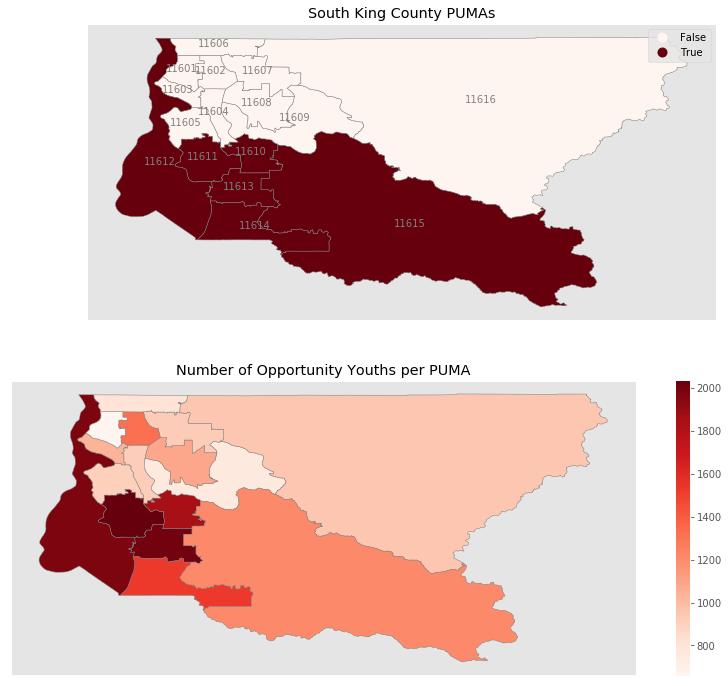

In [29]:
fig, ax = plt.subplots(2,1,figsize=(14,12))

king.plot( ax=ax[0], cmap='Reds',
          edgecolor='grey', column='is_south',
          categorical=True, legend=True)
king.plot(ax=ax[1], cmap='Reds',
          edgecolor='grey', column='oy',
          legend=True)

plt.style.use('ggplot')

for i, geo in king.centroid.iteritems():
    ax[0].annotate(s=i, xy=[geo.x, geo.y], xytext=(geo.x-.05,geo.y), color="grey")

    # show the subplot
    ax[0].figure


ax[0].set_title('South King County PUMAs')
ax[1].set_title('Number of Opportunity Youths per PUMA')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])

plt.savefig('map.png', format='png')